In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score


In [5]:
df = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
df2 = pd.read_csv('Plant_2_Generation_Data.csv')

In [6]:
df

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


In [7]:
df2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [ ]:
df3 = df.copy()
df3.insert(0, "Daily_yield", df2["DAILY_YIELD"])
df3

In [ ]:
df3.isnull().sum()

In [ ]:
df3.index = pd.to_datetime(df3["DATE_TIME"])
print(df3.index)

In [ ]:
df3

In [ ]:
df3['year_day'] = df3.index.strftime('%j').astype(int)
df3.head()

In [ ]:
df3['Day_Time(s)'] = df3.index.hour*60*60 + df3.index.minute*60 + df3.index.second
df3.head()

In [ ]:
df4 = df3.drop(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY'], axis = 1)
df4

In [ ]:
d = df4.values
x = d[:,1:]
y = d[:,:1]



from sklearn.model_selection import train_test_split
X_train_full, X_test , y_train_full, y_test = train_test_split(x, y , test_size = .2, random_state=42)
X_train , X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = .2, random_state=42)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train_sc = s.fit_transform(X_train)
X_test_sc = s.fit_transform(X_test)
X_valid_sc = s.fit_transform(X_valid)

y_train_sc = s.fit_transform(y_train)
y_test_sc = s.fit_transform(y_test)
y_valid_sc = s.fit_transform(y_valid)


print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)




from keras.layers import Dense,Dropout, Flatten
from keras import regularizers
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()

model.add(Flatten(input_shape = X_train_sc.shape[1:]))
model.add(Dense(1024, activation = "relu",kernel_initializer="HeNormal", kernel_regularizer=regularizers.l2(l = .001) ))
model.add(Dropout(0.05))

model.add(Dense(512, activation = "relu" , kernel_regularizer=regularizers.l2(l = .001)))
model.add(Dropout(0.1))

model.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
model.add(Dropout(0.1))

model.add(Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
model.add(Dropout(0.1))



model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(l = .001)))
model.add(Dropout(.1))

model.add(Dense(1, activation="linear"))



import tensorflow as tf
model.compile(loss='mse',
              optimizer= "adam",
              metrics=['mae'])
hist = model.fit(X_train_sc, y_train_sc,
                batch_size=32, epochs=50,
                validation_data=(X_valid_sc, y_valid_sc))


In [ ]:
print(model.evaluate(X_test_sc, y_test_sc))
scaler_y = s.fit(y)

y_predict_sc = model.predict(X_test_sc)
y_predict = scaler_y.inverse_transform(y_predict_sc)

print(r2_score(y_test, y_predict))
explained_variance_score(y_test, y_predict)

In [ ]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['mae'], label='train')
plt.plot(hist.history['val_mae'], label='validate')
plt.legend()

In [ ]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validate')
plt.legend()

In [ ]:
axis_x = [i for i in range(50)]

plt.plot(axis_x,y_predict[:50], label = "predicted", color = "green")
plt.plot(axis_x, y_test[:50], label = "actual",color = "red")
plt.legend()

In [ ]:
d = df4.values
X = d[:,1:]
Y = d[:,:1]
# Y = Y.reshape(-1,1)


print(X.shape)
print(Y.shape)
print(type(X))

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


scaler_X = preprocessing.StandardScaler().fit(X)
scaler_Y = preprocessing.StandardScaler().fit(Y)
X_scale = scaler_X.transform(X)
X_train, X_val_and_test, Y_train_unscaled, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val_unscaled, Y_test_unscaled = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
Y_train = scaler_Y.transform(Y_train_unscaled)
Y_val =  scaler_Y.transform(Y_val_unscaled)
Y_test =  scaler_Y.transform(Y_test_unscaled)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras import regularizers


## kernel_initializer='normal'


model = Sequential()
model.add(Flatten(input_shape = X_train_sc.shape[1:]))
model.add(Dense(64, activation='relu',  kernel_initializer='normal', input_shape=(6,), kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

from keras.optimizers import Adam

#optimizer = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=50,
                validation_data=(X_val, Y_val))

In [ ]:
print(model.evaluate(X_test_sc, y_test_sc))
scaler_y = s.fit(y)

y_predict_sc = model.predict(X_test_sc)
y_predict = scaler_y.inverse_transform(y_predict_sc)

print(f'r2_score , {r2_score(y_test, y_predict)}')
print(f'explained_variance_scor,{explained_variance_score(y_test, y_predict)}')

plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['mae'], label='train')
plt.plot(hist.history['val_mae'], label='validate')
plt.legend()
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validate')
plt.legend()
axis_x = [i for i in range(50)]

plt.plot(axis_x,y_predict[:50], label = "predicted", color = "green")
plt.plot(axis_x, y_test[:50], label = "actual",color = "red")
plt.legend()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score


def data_framework(path_weather, path_generation):
    df = pd.read_csv(path_weather)
    df2 = pd.read_csv(path_generation)
    df3 = df.copy()
    df3.insert(0, "Daily_yield", df2["DAILY_YIELD"])
    df3.index = pd.to_datetime(df3["DATE_TIME"])
    df3['year_day'] = df3.index.strftime('%j').astype(int)
    df3['Day_Time(s)'] = df3.index.hour*60*60 + df3.index.minute*60 + df3.index.second
    df4 = df3.drop(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY'], axis = 1)
    return df4

In [4]:
df = data_framework('Plant_2_Weather_Sensor_Data.csv', 'Plant_2_Generation_Data.csv')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
d = df.values
x = d[:,1:]
y = d[:,:1]


def data_split(x, y):
    X_train_full, X_test , y_train_full, y_test = train_test_split(x, y , test_size = .2, random_state=42)
    X_train , X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = .2, random_state=42)

  

    X_train_sc = s.fit_transform(X_train)
    X_test_sc = s.fit_transform(X_test)
    X_valid_sc = s.fit_transform(X_valid)

    y_train_sc = s.fit_transform(y_train)
    y_test_sc = s.fit_transform(y_test)
    y_valid_sc = s.fit_transform(y_valid)


    print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)
    return X_train_sc,X_test_sc,X_valid_sc,y_train_sc,y_test_sc,y_valid_sc,y_test

X_train_sc,X_test_sc,X_valid_sc,y_train_sc,y_test_sc,y_valid_sc,y_test = data_split(x, y)

from keras.layers import Dense,Dropout, Flatten
from keras import regularizers
from keras.models import Sequential
from keras.optimizers import Adam

def model():
    model = Sequential()

    model.add(Flatten(input_shape = X_train_sc.shape[1:]))
    model.add(Dense(1024, activation = "relu",kernel_initializer="HeNormal", kernel_regularizer=regularizers.l2(l = .001) ))
    model.add(Dropout(0.05))

    model.add(Dense(512, activation = "relu" , kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(0.1))

    model.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(0.1))

    model.add(Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(0.1))



    model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(.1))

    model.add(Dense(1, activation="linear"))
    
    model.compile(loss='mse',
              optimizer= "adam",
              metrics=['mae'])
    return model
    
model = model()
hist = model.fit(X_train_sc, y_train_sc,
                batch_size=32, epochs=50,
                validation_data=(X_valid_sc, y_valid_sc))

(2085, 5) (522, 5) (652, 5) (2085, 1) (522, 1) (652, 1)


In [8]:
from keras.layers import Dense,Dropout, Flatten
from keras import regularizers
from keras.models import Sequential
from keras.optimizers import Adam

def model():
    model = Sequential()

    model.add(Flatten(input_shape = X_train_sc.shape[1:]))
    model.add(Dense(1024, activation = "relu",kernel_initializer="HeNormal", kernel_regularizer=regularizers.l2(l = .001) ))
    model.add(Dropout(0.05))

    model.add(Dense(512, activation = "relu" , kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(0.1))

    model.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(0.1))

    model.add(Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(0.1))



    model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(.1))

    model.add(Dense(1, activation="linear"))
    
    model.compile(loss='mse',
              optimizer= "adam",
              metrics=['mae'])
    return model
    
model = model()
hist = model.fit(X_train_sc, y_train_sc,
                batch_size=32, epochs=50,
                validation_data=(X_valid_sc, y_valid_sc))


Epoch 1/50
66/66 [==============================] - 2s 21ms/step - loss: 3.9009 - mae: 0.7825 - val_loss: 3.4035 - val_mae: 0.6328
Epoch 2/50
66/66 [==============================] - 1s 19ms/step - loss: 3.3258 - mae: 0.6949 - val_loss: 2.9525 - val_mae: 0.6172
Epoch 3/50
66/66 [==============================] - 1s 20ms/step - loss: 2.9175 - mae: 0.6590 - val_loss: 2.5898 - val_mae: 0.6018
Epoch 4/50
66/66 [==============================] - 2s 29ms/step - loss: 2.5967 - mae: 0.6288 - val_loss: 2.3773 - val_mae: 0.6146
Epoch 5/50
66/66 [==============================] - 1s 21ms/step - loss: 2.3194 - mae: 0.6018 - val_loss: 2.1161 - val_mae: 0.6114
Epoch 6/50
66/66 [==============================] - 1s 21ms/step - loss: 2.0819 - mae: 0.5853 - val_loss: 1.8808 - val_mae: 0.5260
Epoch 7/50
66/66 [==============================] - 1s 22ms/step - loss: 1.8803 - mae: 0.5578 - val_loss: 1.7402 - val_mae: 0.5784
Epoch 8/50
66/66 [==============================] - 1s 21ms/step - loss: 1.7284 - m

In [16]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

print(model.evaluate(X_test_sc, y_test_sc))
scaler_y = s.fit(y)
y_predict_sc = model.predict(X_test_sc)
y_predict = scaler_y.inverse_transform(y_predict_sc)
def model_result(y_test, y_predict):
    print(f'r2_score is {r2_score(y_test, y_predict)}')
    print(f'Mean square error is {mean_squared_error(y_test, y_predict)}')
    print(f'explained_variance_score is {explained_variance_score(y_test, y_predict)}')
    
model_result(y_test, y_predict)

21/21 [==============================] - 0s 6ms/step - loss: 0.6086 - mae: 0.4506
[0.6086352467536926, 0.4505515992641449]
21/21 [==============================] - 0s 4ms/step
r2_score is 0.48920829289076884
Mean square error is 5455366.858540948
explained_variance_score is 0.4906029621647755


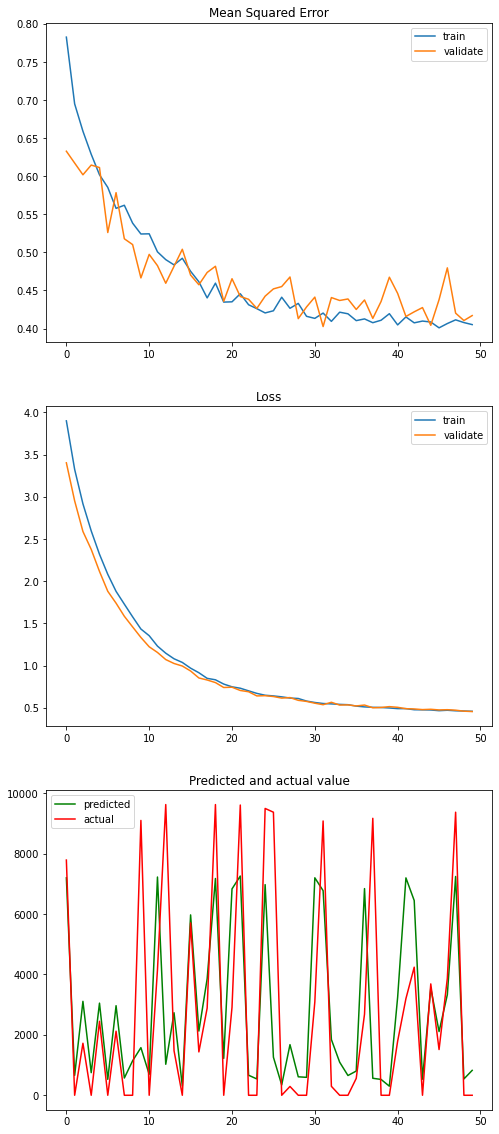

In [30]:
def plot(model, y_predict, y_test):
    fig, [ax, ax1, ax2] = plt.subplots(3,1, figsize = (8, 20))

    ax.set_title('Mean Squared Error')
    ax.plot(model.history['mae'], label='train')
    ax.plot(model.history['val_mae'], label='validate')
    ax.legend()

    ax1.set_title('Loss')
    ax1.plot(model.history['loss'], label='train')
    ax1.plot(model.history['val_loss'], label='validate')
    ax1.legend()
    axis_x = [i for i in range(50)]
    
    ax2.set_title("Predicted and actual value")
    ax2.plot(axis_x,y_predict[:50], label = "predicted", color = "green")
    ax2.plot(axis_x, y_test[:50], label = "actual",color = "red")
    ax2.legend()
    
plot(hist,y_predict, y_test)